In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
twitter_df_final = pd.read_csv('twitter_archive_master.csv')

In [3]:
twitter_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 22 columns):
tweet_id                 1625 non-null int64
in_reply_to_status_id    1625 non-null int64
in_reply_to_user_id      1625 non-null int64
timestamp                1625 non-null object
source_x                 1625 non-null object
text                     1625 non-null object
expanded_urls            1625 non-null object
rating_numerator         1625 non-null float64
rating_denominator       1625 non-null float64
name                     1625 non-null object
rating                   1625 non-null float64
stage                    1625 non-null object
jpg_url                  1625 non-null object
dog_type                 1625 non-null object
confidence_list          1625 non-null float64
favorite_count           1053 non-null float64
retweet_count            1053 non-null float64
followers_count          1053 non-null float64
friends_count            1053 non-null float64
source_y      

### Analysing the most common dog in the dataset

In [4]:
twitter_df_final['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Siberian_husky                     20
Maltese_dog                        19
beagle                             19
Cardigan                           19
Rottweiler                         19
Shetland_sheepdog                  19
kuvasz                             18
Lakeland_terrier                   17
Italian_grey

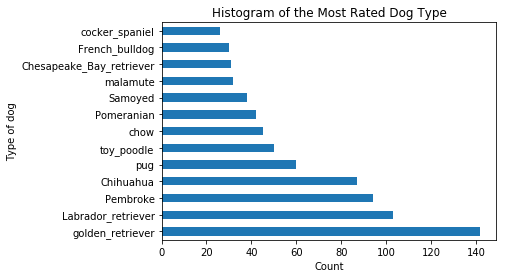

In [5]:
df_dog_type = twitter_df_final.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Dog_types with low number of ratings show a high variaty of mean ratings.

In [9]:
df_dog_type_count = twitter_df_final.groupby('dog_type').count()
df_dog_type_count

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,stage,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,,,
Afghan_hound,2,2,2,2,2,2,2,2,2,2,...,2,2,2,1,1,1,1,1,1,1
Airedale,12,12,12,12,12,12,12,12,12,12,...,12,12,12,8,8,8,8,8,8,8
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,...,16,16,16,9,9,9,9,9,9,9
Appenzeller,2,2,2,2,2,2,2,2,2,2,...,2,2,2,0,0,0,0,0,0,0
Australian_terrier,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,...,6,6,6,4,4,4,4,4,4,4
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,...,11,11,11,8,8,8,8,8,8,8
Blenheim_spaniel,10,10,10,10,10,10,10,10,10,10,...,10,10,10,6,6,6,6,6,6,6
Border_collie,12,12,12,12,12,12,12,12,12,12,...,12,12,12,7,7,7,7,7,7,7


In [10]:
dog_type_count = df_dog_type_count['rating']

In [11]:
df_dog_type_mean = twitter_df_final.groupby('dog_type').mean()

In [12]:
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       8.000000
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.105263
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.448276
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.714286
English_springer                  10.555556
EntleBucher                       11.000000
Eskimo_dog             

In [13]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,2,8.000000
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,10,11.100000
Border_collie,12,10.583333


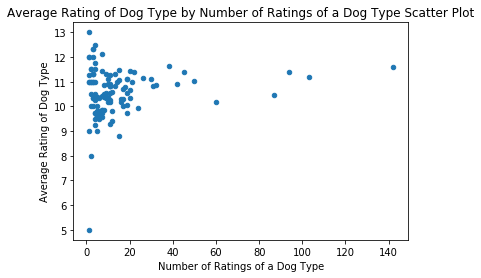

In [14]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

### The highest ratings do not receive the most retweets.

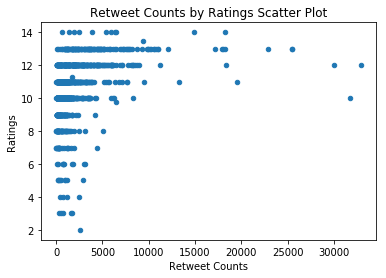

In [15]:
twitter_df_final.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');

### Most used Twitter source

In [20]:
twitter_df_final.source_x.value_counts()

Twitter for iPhone    1596
Twitter Web Client      20
TweetDeck                9
Name: source_x, dtype: int64

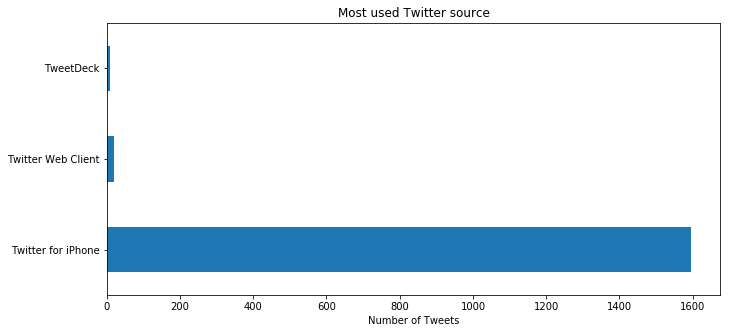

In [21]:
twitter_df_final['source_x'].value_counts().plot('barh', figsize=(11,5), title='Most used Twitter source').set_xlabel("Number of Tweets")
plt.savefig('twitter_source')

### Most common dog names

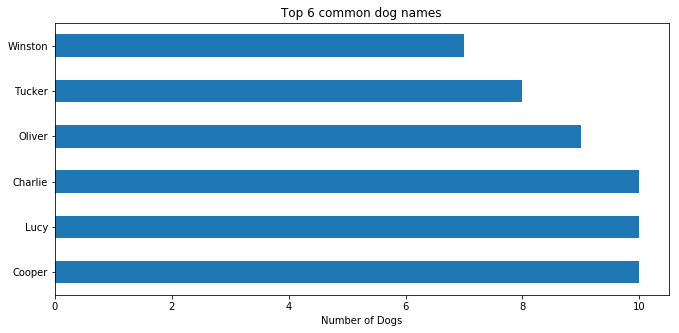

In [22]:
twitter_df_final.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

### Dog stage

(-1.2887489155281924,
 1.2353554618963543,
 -1.2286790096332167,
 1.2103647382990086)

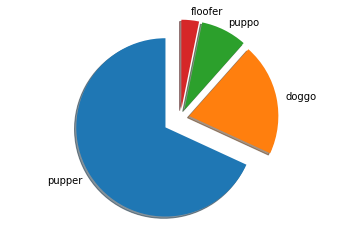

In [27]:
# Plot the data partitioned by dog stage
dog_stage_count = list(twitter_df_final[twitter_df_final['stage'] != 'None']['stage'].value_counts())[0:4]
dog_stages = twitter_df_final[twitter_df_final['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')

In [28]:
twitter_df_final[twitter_df_final['stage'] != 'None'].groupby('stage')['rating_numerator'].mean()

stage
doggo      11.862745
floofer    11.875000
pupper     10.837836
puppo      12.000000
Name: rating_numerator, dtype: float64

<b> Pupper is the most owned dog, but it has the lowest mean rating

### Dog Rating Distribution

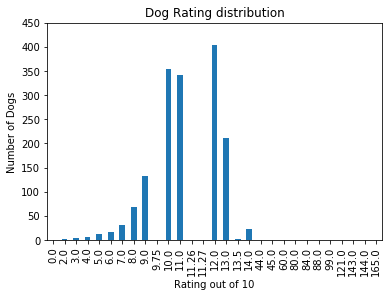

In [29]:
ax = twitter_df_final.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')